In [3]:
# IMPORT LIBRARIES

import math
import pandas as pd  # for convinience
import matplotlib.pyplot as plt  # for graphics
import seaborn as sns  # for nicer graphics

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
# MATH TO CODE

s = 160
n = 100
p = 0.3
u = 0.05
d = -0.05
y = -1
arry=[]
arrM=[]
arrPR=[]
arrM1=[]

while y < n:
    y +=1
    arry.append(y)
    x = n-y
    PR = (math.factorial(n) / (math.factorial(y) * math.factorial(n-y))) * ((p**(n-y)) * ((1-p)**y)) * 100
    arrPR.append(PR)
    M =  s * (1+u)**(n-y) * (1+d)**y
    arrM.append(M)
    if M > 160:
        arrM1.append('Profit')
    else:
        arrM1.append('Loss')

In [5]:
# PRINT THE WHOLE RESULTS

df = pd.DataFrame(list(zip(arry, arrM, arrPR, arrM1)), columns=['101 Possible Scenario', 'S(100)money $', 'S(100)probability %', 'Profit/Loss'])
print (df)

     101 Possible Scenario  S(100)money $  S(100)probability % Profit/Loss
0                        0   21040.201255         5.153775e-51      Profit
1                        1   19036.372564         1.202548e-48      Profit
2                        2   17223.384701         1.388942e-46      Profit
3                        3   15583.062349         1.058683e-44      Profit
4                        4   14098.961173         5.990380e-43      Profit
5                        5   12756.202966         2.683690e-41      Profit
6                        6   11541.326493         9.914745e-40      Profit
7                        7   10442.152541         3.106620e-38      Profit
8                        8    9447.661823         8.426707e-37      Profit
9                        9    8547.884506         2.009926e-35      Profit
10                      10    7733.800268         4.267742e-34      Profit
11                      11    6997.247861         8.147507e-33      Profit
12                      1

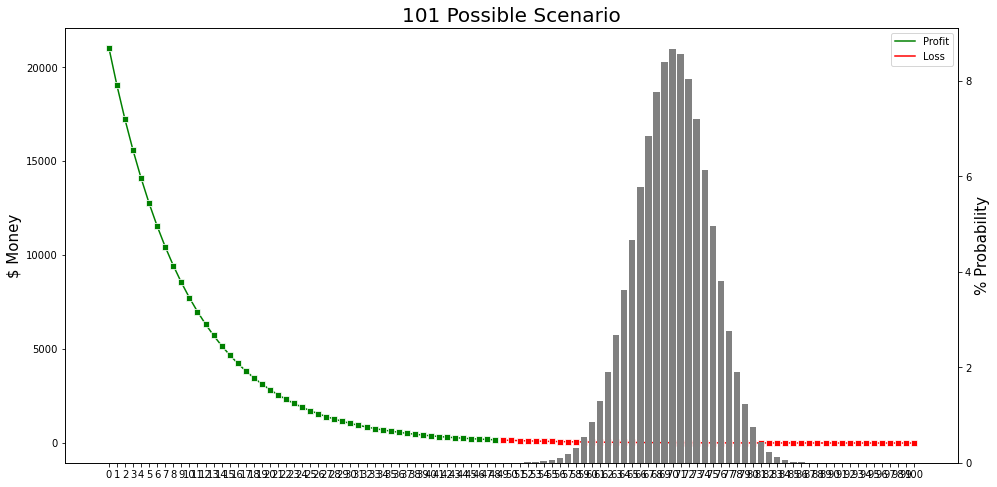

In [45]:
# PLOT THE GRAPH

fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

b= sns.barplot(x='101 Possible Scenario', y='S(100)probability %', data=df, color='gray', ax=ax2)
l= sns.lineplot(x=df.index, y='S(100)money $', data=df, marker='s', hue=arrM1, palette=('green','red'), ax=ax1)

b.axes.set_title("101 Possible Scenario",fontsize=20)
b.set_ylabel("% Probability",fontsize=15)
l.set_ylabel("$ Money",fontsize=15)

plt.xticks(rotation=60)
plt.show()

In [7]:
# PROFIT/LOSS PROBABILITY

ProfitProbability = df.loc[df['Profit/Loss'] == 'Profit', 'S(100)probability %'].sum()
print('Probability of Profit is: %', ProfitProbability)

LossProbability = df.loc[df['Profit/Loss'] == 'Loss', 'S(100)probability %'].sum()
print('Probability of Loss is: %', LossProbability)

Probability of Profit is %: 0.0003561481518642737
Probability of Loss is %: 99.99964385184758


In [31]:
# NUMBER OF PROFIT/LOSS SCENARIO

NumberofProfitScenario=(df[['Profit/Loss']] == 'Profit').sum(axis=0)
NumberofLossScenario=(df[['Profit/Loss']] == 'Loss').sum(axis=0)
print(NumberofProfitScenario, '     is Number of Profit Scenarios')
print(' ')
print(NumberofLossScenario, '     is Number of Loss Scenarios')

Profit/Loss    49
dtype: int64      is Number of Profit Scenarios
 
Profit/Loss    52
dtype: int64      is Number of Loss Scenarios


In [47]:
#THE SCENARIO WHICH HAS MAX POSSIBILITY

column = df['S(100)probability %']
max_index = column.idxmax()

columnPR = df['S(100)probability %']
max_valuePR = columnPR.max()

valueM = df['S(100)money $'][70]

LossValue = 160 - valueM

print('The scenario with the maximum probability is: ', max_index)
print('The maximum probability is: %',max_valuePR)
print('The value is: $',valueM, '  ($', LossValue, ' Loss)' )

The scenario with the maximum probability is:  70
The maximum probability is: % 8.678386475342762
The value is: $ 19.074419289877753   ($ 140.92558071012223  Loss)
